<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades 

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía 


Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones por pares entre las variables para considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales. 
 

## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [10]:
# Utilice este espacio para escribir el código.
#Cargamos las librerias a utilizar
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Para abrir en Colab
#ub_ciudades='https://docs.google.com/spreadsheets/d/e/2PACX-1vRvRsvlyPMnNQdP5dTnsG9LmZ1u0nZlrRqjG6hyYoeXMj2iX904fq-wFxJgNVYea9v0Q4o2DURXWb0p/pub?output=csv'
#lugares = pd.read_csv(ub_ciudades, sep=",",decimal=".")
#lugares = lugares.set_index("Ciudad")


#Para abrir local
lugares= pd.read_csv('data/lugares.csv', index_col='Ciudad')
# Cargamos y visualizamos la primeras observaciones de los datos
lugares.head()


,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
Ciudad,,,,,,,,,
"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


### Comentarios punto 1:
Se cargaron los datos usando el comando read_csv

### 2.  Análisis descriptivo de las variables. 

Para el análisis descriptivo haga uso de correlogramas, histogramas y estadísticas descriptivas. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables. Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

 
Las variables de cada lugar son:
['Clima y Terreno', 'Alojamiento', 'Cuidado de la salud y el medio ambiente', 'Crimen', 'Transporte', 'Educación', 'Artes', 'Recreación', 'Economía']
 
Filas completas con datos faltantes: 
Empty DataFrame
Columns: [Clima y Terreno, Alojamiento, Cuidado de la salud y el medio ambiente, Crimen, Transporte, Educación, Artes, Recreación, Economía]
Index: []
 
Tipos de datos de cada columna:
Clima y Terreno                            int64
Alojamiento                                int64
Cuidado de la salud y el medio ambiente    int64
Crimen                                     int64
Transporte                                 int64
Educación                                  int64
Artes                                      int64
Recreación                                 int64
Economía                                   int64
dtype: object
 
Información estadística de cada variable:
                                         count         mean          std  \

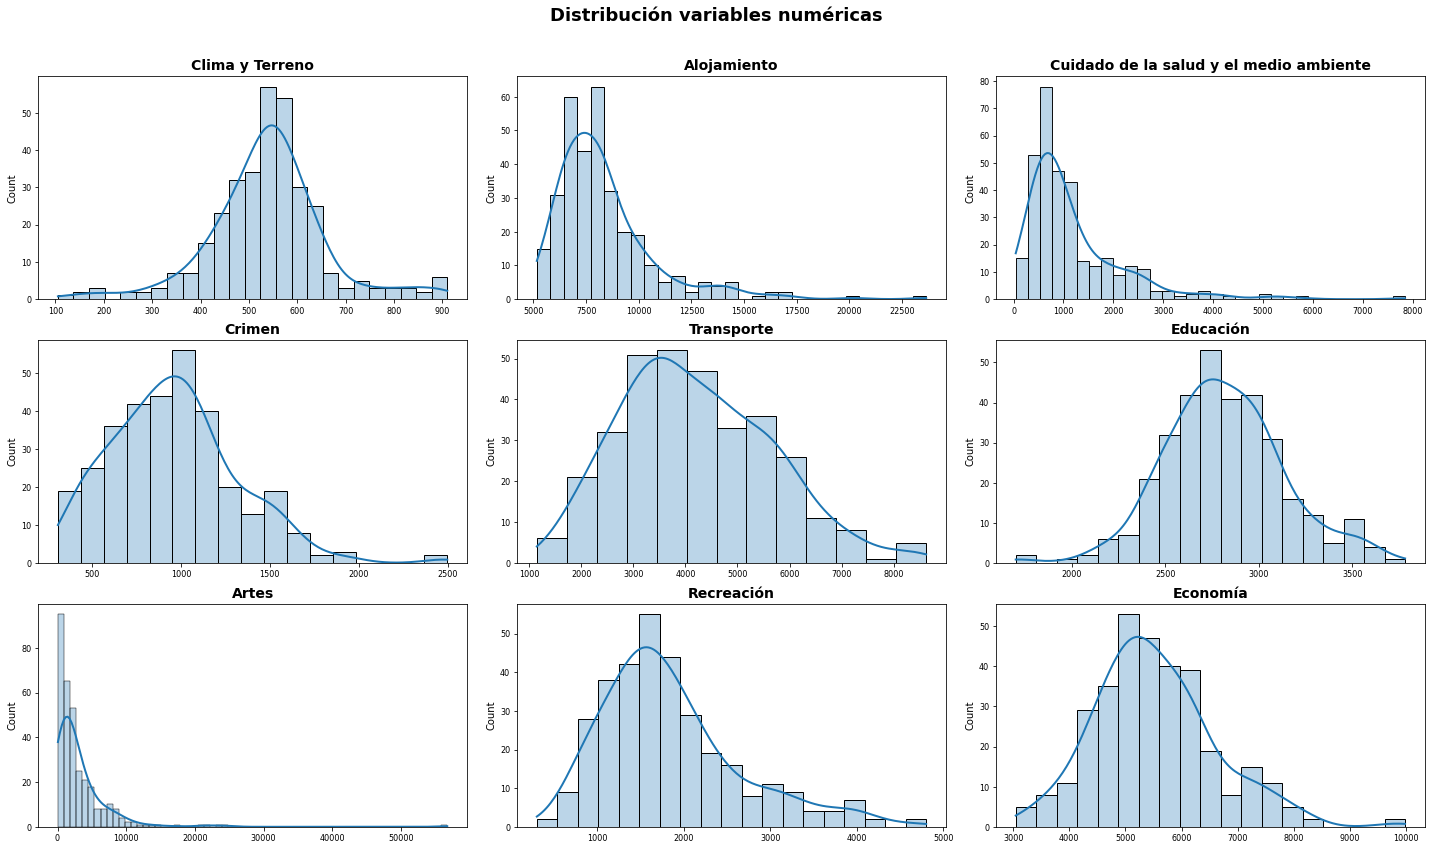

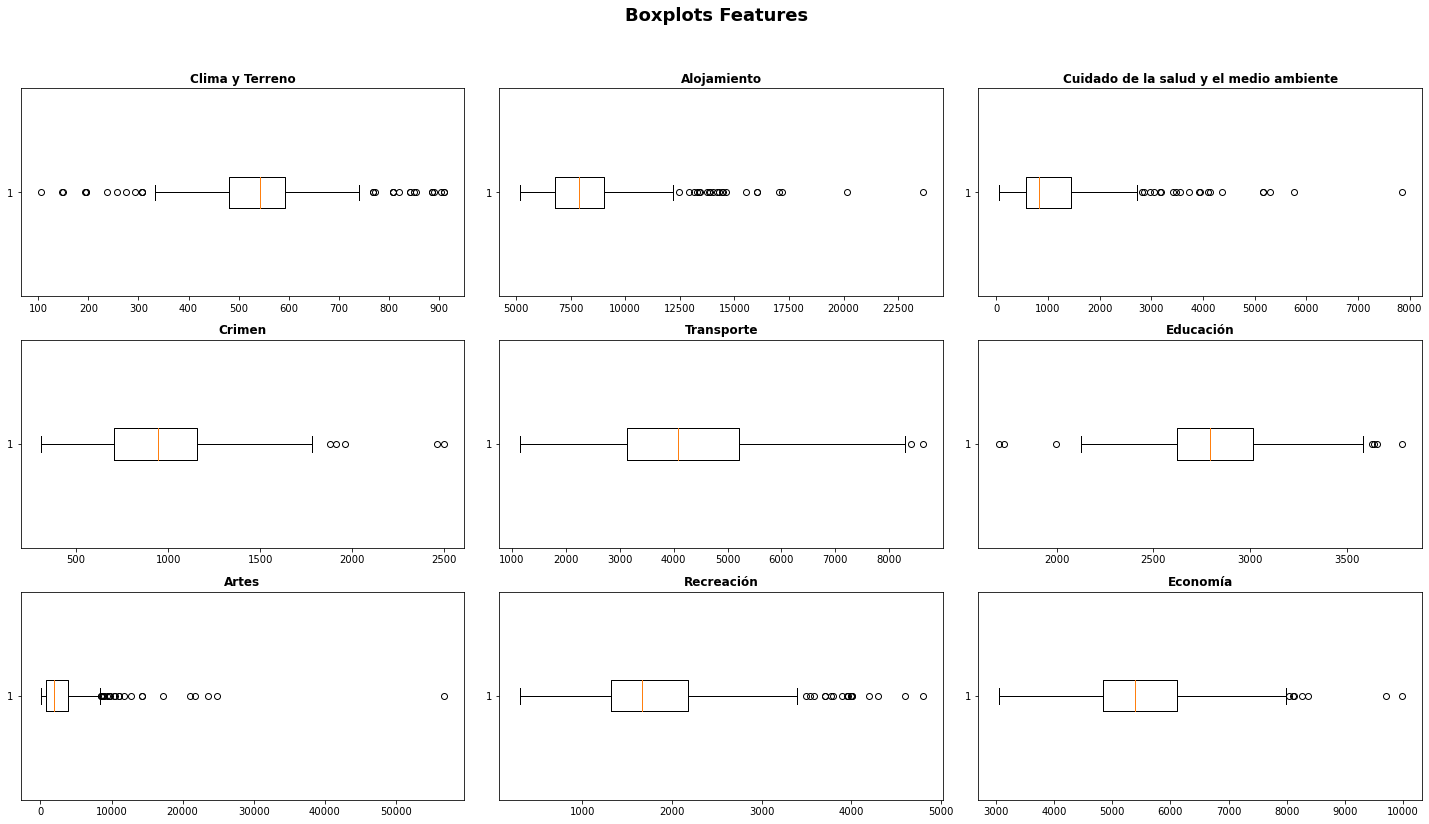

In [ ]:
# Utilice este espacio para escribir el código.

#Función para calcular los datos faltantes
def porcentaje_faltantes(df:pd.DataFrame)->pd.DataFrame:
  temp= 100* df.isnull().sum() / len(df)
  return temp[temp >= 0].sort_values()

#Función para calcular el % de completitud
def porcentaje_completitud(df:pd.DataFrame)->float:
  suma_nan= sum(df.isnull().sum())
  porcentaje_nan= 100*suma_nan/(df.shape[0]*df.shape[1])
  return (100- porcentaje_nan)

#Seleccionamos las posibles variables
print(" ")
features =  lugares.columns
print("Las variables de cada lugar son:")
print(list(features.T))

#Investigar si hay filas completas con datos faltasntes.
print(" ")
print('Filas completas con datos faltantes: ')
x=lugares[lugares[features].isnull().all(1)]
print(x)

#Tipo de dato de cada columna
print(" ")
print("Tipos de datos de cada columna:")
print(lugares.dtypes)

#Información estadística de las variables
print(" ")
print("Información estadística de cada variable:")
print(lugares[features].describe().T)


# Gráfico de distribución para cada variable numerica
# ==============================================================================
variables_predictoras = lugares.select_dtypes(include=['int64','uint8','float64']).columns.to_list()

# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(3,3, figsize=(20, 12))
fig.subplots_adjust(top=0.8)
df=lugares[variables_predictoras]
ax = axes.ravel()                     
for i in range(0,len(variables_predictoras)): 
    sns.histplot(
        data    = df.iloc[:,i],
        stat    = "count",
        kde     = True,
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = ax[i]
    )
    ax[i].set_title(variables_predictoras[i], fontsize = 14, fontweight = "bold")
    ax[i].tick_params(labelsize = 8)
    ax[i].set_xlabel("")
  
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 18, fontweight = "bold");

#Boxplots  de variables 
# =============================================================================
fig, axes = plt.subplots(3,3, figsize=(20, 12))
fig.subplots_adjust(top=0.8)
ax = axes.ravel()                     
for i in range(0,len(variables_predictoras)): 
    ax[i].boxplot(df.iloc[:, i],vert=False)
    ax[i].set_title(df.columns[i], fontsize=12,fontweight = "bold")  
fig.suptitle("Boxplots Features", fontsize = 18, fontweight = "bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#Plot de relaciones por pares
# =============================================================================
ax=sns.pairplot(lugares, corner=True)
ax.fig.suptitle("Plot de relaciones por pares",fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

 #Correlación entre columnas numéricas incluyendo la variable dependiente
# =============================================================================
variables_predictoras2 = lugares.select_dtypes(include=['int64','uint8','float64']).columns.to_list()
corrM = lugares[variables_predictoras2].corr()
fig=plt.figure(figsize=(35, 10))
ax = sns.heatmap(
    corrM, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    annot_kws={"size": 8}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
fig.suptitle("Matrix de Correlacion",fontsize=18)
plt.show()

#Calculando VIF para cada featiure
# =============================================================================
vif_data = pd.DataFrame()

vif_data["feature"] = lugares[variables_predictoras2].columns
 
vif_data["VIF"] = [variance_inflation_factor(lugares[variables_predictoras2].values, i)
                          for i in range(len(lugares[variables_predictoras2].columns))]
  
print(vif_data)

### Comentarios punto 2:
- Se requieren 36 gráficos de dispersion bivariados.
$\left(\left(\begin{array}{c}
9\\
2
\end{array}\right)=\frac{9\times8}{2}=36\right)$
. Se gráfican con el comando pairplot de la librería seaborn.

- En las gráficas de dispersión y en la  matriz de correlación se observa una alta correlación entre el "Cuidado de la salud y medio ambiente" y las "Artes"

- En las otras variables no se observan relaciones fácil de identificar con la estadística descriptiva.

### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores. Explique la conexión  entre los eigen valores, los eigen vectores, y los componentes principales. Examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

In [ ]:
# Utilice este espacio para escribir el código.
print("La matriz de varianzas es: ")
S=lugares.cov()
print(S)

#Los valores propios son:
eig_val, eig_vec = np.linalg.eig(S)

# Se ordenan
print(" ")
print("Los eigen valores son:  ")
indices_ordenados= np.argsort(eig_val)[::-1]
eig_val_ord=eig_val[indices_ordenados]
print(eig_val_ord)

print(" ")
eig_vector_ord = eig_vec[indices_ordenados]
print("Los eigen vectores de son:  ")
print(eig_vector_ord.T)

lugares_CP=lugares

# Calculo de los componentes principales

for i in range(eig_vector_ord.shape[0]):
  CP=lugares.dot(eig_vector_ord[:,i].T)
  lugares_CP = lugares_CP.assign(**{'CP_'+ str(i+1): CP})

print(" ")
print(lugares_CP.head())

#Proporción de la varianza explicada
varianza_explicada=eig_val_ord/sum(eig_val)
np.set_printoptions(precision = 3, suppress = True) 

print(" ")
print("Porcentaje % de varianza explicada por cada componente principal: ")
print(varianza_explicada*100)

x = range(1,len(varianza_explicada)+1)
#Generamos una grafica para la varianza explicada
plt.bar(x,varianza_explicada*100, label='Var.explicada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje [%]')
plt.title("Varianza explicada")
plt.legend()
plt.grid()
plt.show()


print(" ")
print("Porcentaje % de varianza explicada acumulada por cada componente principal: ")
varianza_explicada_acum=np.cumsum(varianza_explicada)
print(varianza_explicada_acum*100)

#Generamos otra grafica para la varianza explicada acumulada
x = range(1,len(varianza_explicada)+1)
plt.plot(x, varianza_explicada_acum*100, label='Var.expl.Acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje [%]')
plt.title("Varianza explicada acumulada")
plt.legend()
plt.grid()
plt.show()


from mpl_toolkits.mplot3d import Axes3D
print(" ")
print("Se seleccionaron los tres primeros componentes principales ya que explican la varianza en un : "+ str(round(varianza_explicada_acum[2]*100,2))+" %")
print(" ")



### Comentarios punto 3:
- Se observa que hay una gran diferencia en el orden de magnitud de los valores propios, por lo cual se puede concluir que sí se puede reducir la dimensionalidad de las 9 variables.

- Los primeros tres componentes principales pueden explicar el 93.94 % de la varianza acumulada, por lo cual, para este caso es la cantidad que se preserva.

- El 75.29 % de la varianza del conjunto de datos queda a lo largo del primer componente principal, el 13.55 % a lo largo del segundo y el 5.052 %  a lo largo del tercero, que aunque es un % pequeño en comparación con la proporción de los dos primeros,se incluye para que se explique la varianza de los datos en más de un 90%.

### 4.  Interpretación de los componentes principales. 

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, los pesos obtenidos pueden identificar dimensiones menores de los datos? Dé una interpretación a estas dimensiones, para ello puede utilizar gráficas (ej. `biplot`), tablas, etc.

In [ ]:
# Utilice este espacio para escribir el código.
import mpl_toolkits.mplot3d
# Realizamos el gráfico 3D de los tres componentes principales
fig = plt.figure(figsize=(9,9))
axes = Axes3D(fig)
axes.set_title('Gráfico de dispersión de los 3 Componentes Principales', size=14)
axes.set_xlabel('CP_1')
axes.set_ylabel('CP_2')
axes.set_zlabel('CP_3')
axes.scatter(lugares_CP['CP_1'],lugares_CP['CP_2'],lugares_CP['CP_3'],c='r', cmap = 'prism', s=10)
for index, row in lugares_CP.iterrows():
  axes.text(row['CP_1'], row['CP_2'], row['CP_3'], index,zorder=1)
fig.show()


# Realizamos los gráficos de dispersión entre los tres componentes principales
# CP_1 Vs CP_2
import plotly.express as px # Cargamos el paquete plotly para hacer gráficas interactivas.
print(" ")
print("Se grafican los componentes principales 1 y 2")
print(" ")
pcas=lugares_CP[['CP_1','CP_2','CP_3']]
fig1 = px.scatter(pcas, x = "CP_1", y = "CP_2",
    text = pcas.index.values)
fig1.update_traces(textposition = 'top center')
fig1.show()

print(" ")
print("Se grafican los componentes principales 1 y 3")
print(" ")
fig2 = px.scatter(pcas, x = "CP_1", y = "CP_3",
    text = pcas.index.values)
fig2.update_traces(textposition = 'top center')
fig2.show()

print(" ")
print("Se grafican los componentes principales 2 y 3")
print(" ")
fig3 = px.scatter(pcas, x = "CP_2", y = "CP_3",
    text = pcas.index.values)
fig3.update_traces(textposition = 'top center')
fig3.show()


### Comentarios punto 4:
- Los primeros tres componentes principales pueden explicar el 93.94 % de la varianza acumulada, por lo cual, para este caso es la cantidad que se preserva.

- El simple hecho de reducir a tres dimensiones los datos, genera una ventaja para poder observar los datos, en este caso se ve que hay agrupamientos importantes en las gráficos de dispersión de los componentes principales.


### 5.   Detección de ciudades inusuales.

A partir de los componentes seleccionados, idintifique si existen ciudades inusuales o átipicas. Explique claramente qué procedimiento utilizó para identificarlas e interprete los resultados incluyendo qué entiende por ciudad inusual o atípica.

In [ ]:

#Boxplots  de cada componente principal
# =============================================================================
variables_predictoras=['CP_1','CP_2','CP_3']
df=pcas
fig, axes = plt.subplots(1,3, figsize=(20, 4))
fig.subplots_adjust(top=0.8)
ax = axes.ravel()                     
for i in range(0,len(variables_predictoras)): 
    ax[i].boxplot(df.iloc[:, i],vert=False)
    ax[i].set_title(df.columns[i], fontsize=12,fontweight = "bold")  
fig.suptitle("Boxplots Componentes principales", fontsize = 18, fontweight = "bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

def detect_outliers_iqr(data):
  q1=np.percentile(data,25)
  q3=np.percentile(data,75)
  IQR=q3-q1
  IQR
  lwr_bound=q1-(1.5*IQR)
  upr_bound=q3+ (1.5*IQR)
  x=data[(data<lwr_bound)+(data>upr_bound)]
  ciudades_atipicas=x.index
  return ciudades_atipicas

out_1=detect_outliers_iqr(pcas['CP_1'])
out_2=detect_outliers_iqr(pcas['CP_2'])
out_3=detect_outliers_iqr(pcas['CP_3'])

d=np.concatenate((out_1, out_2,out_3), axis=None)
ciudades_atipicas=list(np.unique(d))
print(" ")
print("Las ciudades que podrían ser atípicas son:")
print('\n'.join(map(str, ciudades_atipicas)))

### Comentarios punto 5:

- Criterio de outliers: Para este caso se utiliza el criterio de que los puntos de datos que se encuentren 1.5 veces el IQR (IQR = Q3 - Q1) por encima de Q3 y por debajo de Q1 son valores atípicos.

- Se puede observar que se calculan 39 ciudades cómo "atípicas" sin embargo, puede que sean valores reales que se generan valor para la información y no requieren que sean excluidas de los datos, sin embergom, sus características son diferentes al agrupamiento que se está haciendo con la reducción de la dimensionalidad.

### 6.   Robustez de resultados: Estandarizando los datos.

Repita los pasos anteriores con los datos estandarizados. Compare los resultados que obtuvo previo a, y luego de estandarizar los datos. Los resultados cambian significativamente? Justifique su respuesta. (Nota en este punto del ejercicio puede utilizar la función `PCA` de la libreria `sklearn`)

In [ ]:
# Utilice este espacio para escribir el código.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Escalado de Features
scale = StandardScaler()
X_train= scale.fit_transform(lugares)

model_pca = PCA()
Componentes = model_pca.fit_transform(X_train)
varianza_explicada_2=model_pca.explained_variance_ratio_

#Generamos otra grafica para la varianza explicada acumulada
x = range(1,len(varianza_explicada_2)+1)
plt.bar(x, varianza_explicada_2*100, label='Var.explicada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje [%]')
plt.title("Varianza explicada (con variables estandarizadas)")
plt.legend()
plt.grid()
plt.show()

print(" ")
varianza_expli_acum_2=np.cumsum(model_pca.explained_variance_ratio_)
print(varianza_expli_acum_2)
plt.plot(x, varianza_expli_acum_2*100, label='Var.expl.Acumulada')
plt.xlabel('Componentes principales')
plt.ylabel('Porcentaje [%]')
plt.title("Varianza explicada acumulada (con variables estandarizadas)")
plt.legend()
plt.grid()
plt.show()

# Heatmap componentes
# ==============================================================================
print(" ")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
componentes = model_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(np.arange(9), lugares_CP.columns[0:9])
plt.xticks(np.arange(model_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();




### Comentarios punto 6:

- Los resultados cambian significativamente ya que con las variables estandarizadas, se aumenta el número de componentes principales que explican el 90% o mas o la varianza de los datos (7 componentes principales para explicar e 95.1 % de la varoanza)

- Este cambio en los resultado de los componentes principales, refleja calaramente que el algoritmo es sensible a las unidades de medda de las variables.

- Se puede observar que se calculan 39 ciudades cómo "atípicas" sin embargo, puede que sean valores reales que se generan valor para la información y no requieren que sean excluidas de los datos, sin embergo, sus características son diferentes al agrupamiento que se está haciendo con la reducción de la dimensionalidad.